In [9]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import load_model
print(tf.__version__)

2.0.0-alpha0


In [10]:
def plot_images(images, cls_true, cls_pred=None):
    
    fig, axes = plt.subplots(1, 5)
    fig.subplots_adjust(hspace=1, wspace=0.2)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(28,28), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "Actual: {0}".format(cls_true[i])
        else:
            xlabel = "Actual: {0},\n Prediction: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

In [11]:
model = load_model('model.keras')

In [12]:
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [13]:
print(x_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [14]:
#x_test = tf.keras.utils.normalize(nx_test, axis=1)
y_test = keras.utils.to_categorical(y_test, 10)
x_test = x_test.reshape(x_test.shape[0], 28*28)

In [15]:
result = model.evaluate(x_test, y_test)
for name, value in zip(model.metrics_names, result):
    print (name, value)

10000/10000 [==============================] - 1s 60us/sample - loss: 69.8362 - accuracy: 0.9586
loss 69.83619220237716
accuracy 0.9586


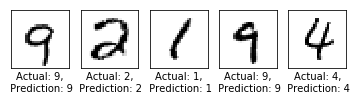

In [16]:
R_img = range (105,110)
plot_images(x_test[R_img], np.argmax(y_test[R_img],axis=1), np.argmax(model.predict(x_test[R_img]), axis=1))